## The purpose of my project here will be to display the following planetary data in a concise, easy to comprehend way. Jupyter Notebook is my platform of choice, and I will be utilizing Python and it's components: NumPy, Pandas, Seaborn, and Matplotlib to emphasise this data.

### The first set of data that will be displayed is mainly numeric, arithemetic, and showcasing the base knowledge of Python programming in regard to lists, loops, and simple dictionaries.

Below is a display of a simple for loop that combines each planet in individual strings to one string.

In [10]:
list_of_planets = ['Mercury', 'Venus', 'Earth', 'Mars',
                   'Jupiter', 'Saturn', 'Uranus', 'Neptune']
planets = ''

for planet in list_of_planets:
    planets += str(planet + ", ")

print("A list of all planets: ", planets)

A list of all planets:  Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, Neptune, 


Next is a dictonary that was created to emphasize the data for each planet and its distance from the sun (in millions of miles)

In [11]:
planet_distance = {'Mercury':35, 'Venus':67, 'Earth':93, 'Mars':142,
                   'Jupiter':484, 'Saturn':889, 'Uranus':1790,
                   'Neptune':2880}
planet_distance

{'Mercury': 35,
 'Venus': 67,
 'Earth': 93,
 'Mars': 142,
 'Jupiter': 484,
 'Saturn': 889,
 'Uranus': 1790,
 'Neptune': 2880}

To show if a planet's distance is before or after the asteroid belt, an if-elif-else statement will be used (297 million miles is the location).

In this example, we use the distance of Jupiter.

In [12]:
distance = 484

if distance == 297:
    print(distance, "is located in the asteroid belt.")
elif 0 < distance < 297:
    print(distance, "is located before the asteroid belt.")
elif 297 < distance < 3670:
    print(distance, "is located after the asteroid belt.")
else:
    print(distance, "is very far away!")

484 is located after the asteroid belt.


Another way we can organize more data is by including some additional components, such as the sun, and Pluto. The following list demonstrates the use of len() and iteration to print the index values of the solar system, in the order away from the Sun.

In [13]:
solar_system = ['Sun', 'Mercury', 'Venus', 'Earth', 'Mars',
                'Jupiter', 'Saturn', 'Uranus', 'Neptune', 'Pluto']
for i in range(len(solar_system)):
    print(i, solar_system[i])

0 Sun
1 Mercury
2 Venus
3 Earth
4 Mars
5 Jupiter
6 Saturn
7 Uranus
8 Neptune
9 Pluto


The enumerate iterator can perform this same action as well:

In [14]:
for i, val in enumerate(solar_system):
    print(i, val)

0 Sun
1 Mercury
2 Venus
3 Earth
4 Mars
5 Jupiter
6 Saturn
7 Uranus
8 Neptune
9 Pluto


### This next set of data will focus on utilizing NumPy, Pandas, and MatPlotLib.

First, we begin by importing NumPy, Pandas, and MatPlotLib.

In [19]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

We can utilize information, like planet distance from the sun, by importing it as a .csv file instead of creating a dictionary as we did earlier. 

In [55]:
!head -9 /Users/sonia/Files/planet_distance.csv









Neptune,2880

With this information, we are able to print out the distance of the planets via a NumPy array as well as create graphs. This gives us a better way to visualize the data we have.

In [53]:
data = pd.read_csv('/Users/sonia/Files/planet_distance.csv')
distance = np.array(data['distance(miles)'])
print(distance)

[  35   67   93  142  484  889 1790 2880]


In [31]:
%matplotlib inline
import seaborn; seaborn.set() #sets the plot style

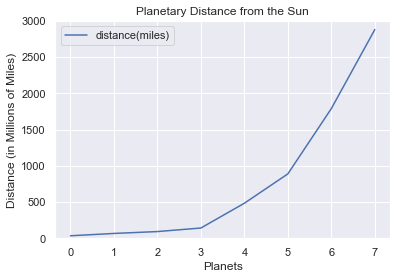

In [65]:
data.plot()
plt.title('Planetary Distance from the Sun')
plt.ylim(0, 3000)
plt.xlabel('Planets')
plt.ylabel('Distance (in Millions of Miles)');

From the data above, its easy to see the exponential distance from the sun that the planets have with a graph that shows this data. All of this is possible with MatPlotLib.

#### In addition to this, NumPy is also fantastic with creating one, two, and three-dimensional arrays that can also be utilized in Pandas.

The following shows utilizing Pandas to extract the planet distance as a NumPy array, turning it into a DataFrame.

It then initializes lists for X and Y, and plots it as a bar graph.

In [74]:
distance_pd = pd.read_csv('/Users/sonia/Files/planet_distance.csv')
distance_pd

,Name,distance(miles)
0,Mercury,35
1,Venus,67
2,Earth,93
3,Mars,142
4,Jupiter,484
5,Saturn,889
6,Uranus,1790
7,Neptune,2880


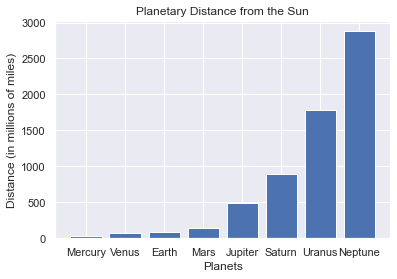

In [75]:
df = pd.DataFrame(distance_pd)

X = list(df.iloc[:, 0])
Y = list(df.iloc[:, 1])

plt.bar(X, Y, color='b')
plt.title('Planetary Distance from the Sun')
plt.xlabel('Planets')
plt.ylabel('Distance (in millions of miles)')

plt.show()

In addition, we can add more information to the DataFrame by adding a new column, moons, to show how many moons each planet has.

In [82]:
moons = [0, 0, 1, 2, 79, 82, 27, 14]
df['moons'] = moons

print(df)

      Name  distance(miles)  moons
0  Mercury               35      0
1    Venus               67      0
2    Earth               93      1
3     Mars              142      2
4  Jupiter              484     79
5   Saturn              889     82
6   Uranus             1790     27
7  Neptune             2880     14


This data can also be added back to the original .csv file by utilizing to_csv:

In [83]:
df.to_csv('/Users/sonia/Files/planet_distance.csv')

And we verify that the data was added by printing distance_pd:

In [84]:
distance_pd

,Name,distance(miles),moons
0,Mercury,35,0
1,Venus,67,0
2,Earth,93,1
3,Mars,142,2
4,Jupiter,484,79
5,Saturn,889,82
6,Uranus,1790,27
7,Neptune,2880,14


## This last section of data will be utilizing Seaborn, a library that utilizes matplotlib, amongst other Pandas attributes. The data we will be pulling from will be more advanced planetary data from the Planets dataset. 

In [86]:
import seaborn as sns
planets = sns.load_dataset('planets')

In [87]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


From the above information, the data in Planets gives information on various planets that have been discovered around other stars. The columns include the method, number, orbital period, mass, distance, and year, with the majority of columns containing numeric data.

However, there is so much more to this data than meets the eye. Introducing the groupby operation, which takes away a lot of steps to compute and update data such as the sum, mean, count, min, max, etc. By using describe(), you can look at all of the orbital periods and the columns pertaining to those:

In [94]:
planets.groupby('orbital_period').describe()

number                                    mass       ...  \
                count mean std  min  25%  50%  75%  max count mean  ...   
orbital_period                                                      ...   
0.090706          1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   0.0  NaN  ...   
0.240104          1.0  2.0 NaN  2.0  2.0  2.0  2.0  2.0   0.0  NaN  ...   
0.342887          1.0  2.0 NaN  2.0  2.0  2.0  2.0  2.0   0.0  NaN  ...   
0.355000          1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   0.0  NaN  ...   
0.453285          1.0  3.0 NaN  3.0  3.0  3.0  3.0  3.0   0.0  NaN  ...   
...               ...  ...  ..  ...  ...  ...  ...  ...   ...  ...  ...   
40000.000000      1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   0.0  NaN  ...   
69000.000000      1.0  4.0 NaN  4.0  4.0  4.0  4.0  4.0   0.0  NaN  ...   
170000.000000     1.0  4.0 NaN  4.0  4.0  4.0  4.0  4.0   0.0  NaN  ...   
318280.000000     1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   0.0  NaN  ...   
730000.000000     1.0  1.0 NaN  1.0  1.0  1.0  1.0  1.0   0.0  NaN  ...   

               distance           year                                      \
                    75%      max count    mean std     min     25%     50%   
orbital_period                                                               
0.090706        1200.00  1200.00   1.0  2011.0 NaN  2011.0  2011.0  2011.0   
0.240104        1180.00  1180.00   1.0  2011.0 NaN  2011.0  2011.0  2011.0   
0.342887        1180.00  1180.00   1.0  2011.0 NaN  2011.0  2011.0  2011.0   
0.355000            NaN      NaN   1.0  2013.0 NaN  2013.0  2013.0  2013.0   
0.453285          38.70    38.70   1.0  2011.0 NaN  2011.0  2011.0  2011.0   
...                 ...      ...   ...     ...  ..     ...     ...     ...   
40000.000000        NaN      NaN   1.0  2011.0 NaN  2011.0  2011.0  2011.0   
69000.000000      39.94    39.94   1.0  2008.0 NaN  2008.0  2008.0  2008.0   
170000.000000     39.94    39.94   1.0  2008.0 NaN  2008.0  2008.0  2008.0   
318280.000000      7.69     7.69   1.0  2008.0 NaN  2008.0  2008.0  2008.0   
730000.000000       NaN      NaN   1.0  2006.0 NaN  2006.0  2006.0  2006.0   

                                
                   75%     max  
orbital_period                  
0.090706        2011.0  2011.0  
0.240104        2011.0  2011.0  
0.342887        2011.0  2011.0  
0.355000        2013.0  2013.0  
0.453285        2011.0  2011.0  
...                ...     ...  
40000.000000    2011.0  2011.0  
69000.000000    2008.0  2008.0  
170000.000000   2008.0  2008.0  
318280.000000   2008.0  2008.0  
730000.000000   2006.0  2006.0  

[988 rows x 32 columns]

The following code utilizes the GroupBy object to give the sum of the mass that each method is sensitive to.

In [91]:
planets.groupby('method')['mass'].sum()

method
Astrometry                          0.00000
Eclipse Timing Variations          10.25000
Imaging                             0.00000
Microlensing                        0.00000
Orbital Brightness Modulation       0.00000
Pulsar Timing                       0.00000
Pulsation Timing Variations         0.00000
Radial Velocity                  1341.65638
Transit                             1.47000
Transit Timing Variations           0.00000
Name: mass, dtype: float64

You can also make plots with this data; as seen above, a bar plot can show two dimensional data very effectively. The below graph shows the Planets dataset with the number of discovered planets for each year.

/Users/sonia/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


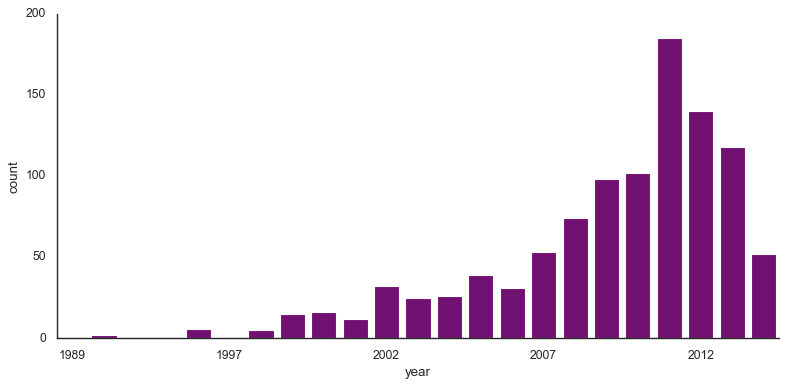

In [149]:
with sns.axes_style('white'):
    bar = sns.catplot('year', data=planets, aspect=2,
                       kind='count', color='purple')
    bar.set_xticklabels(step=5)

An easy way to visualize the multidimensional relationship between the number and the rest of the columns is to call sns.pairplot:

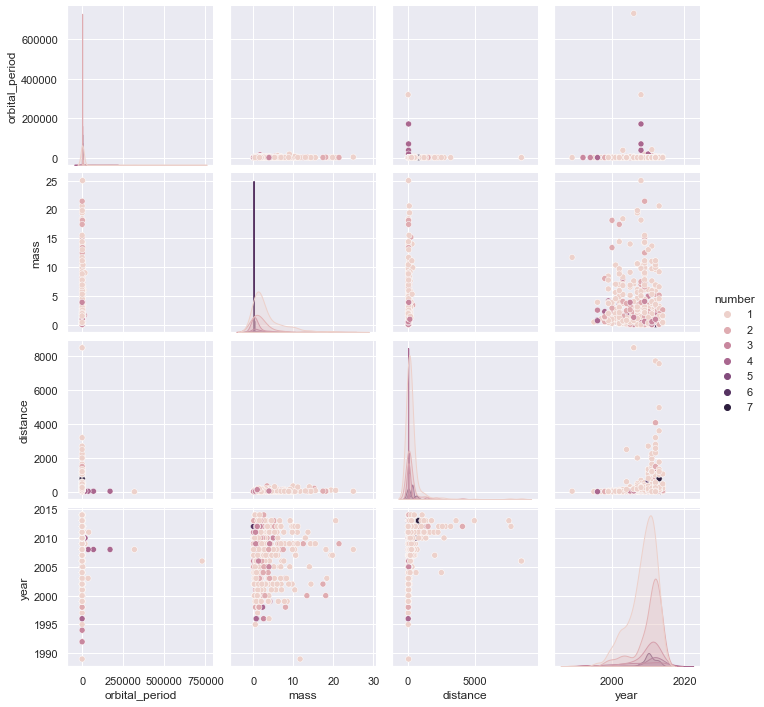

In [102]:
sns.pairplot(planets, hue='number', height=2.5);

And another way to visualize the data (number) would be in a scatterplot. 

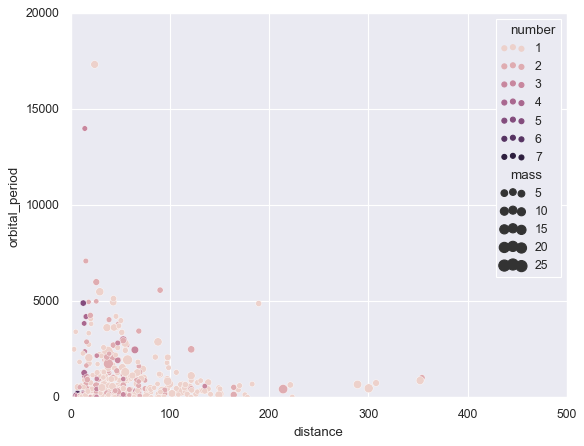

In [146]:
plt.style.use('classic')
sns.set()

ax = sns.scatterplot(x = 'distance', y = 'orbital_period',
                     hue = 'number', size = 'mass', sizes = (20, 100),
                     data = planets)
plt.xlim(0, 500)
plt.ylim(0, 20000);

This next chart shows the distance of the planet in regards to its mass:

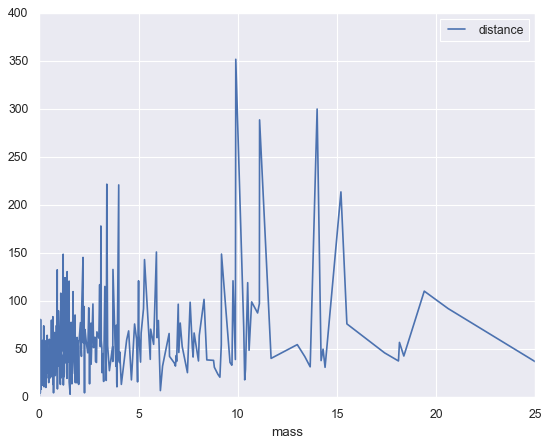

In [147]:
planets.pivot_table('distance', 'mass').plot();

In a similar graph, this time as a scatterplot, you can see the smaller the mass of the planets, the smaller their orbital period, but the data is not so self-explanatory:

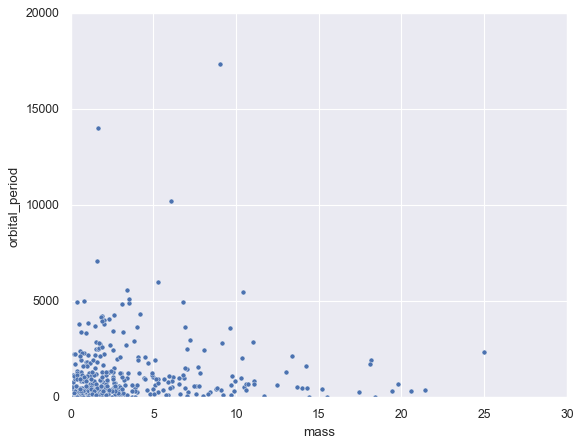

In [145]:
sns.scatterplot(data = planets, x = 'mass', y = 'orbital_period')
plt.xlim(0, 30)
plt.ylim(0, 20000);